In [ ]:
%matplotlib inline
import librosa
import librosa.display
import IPython
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

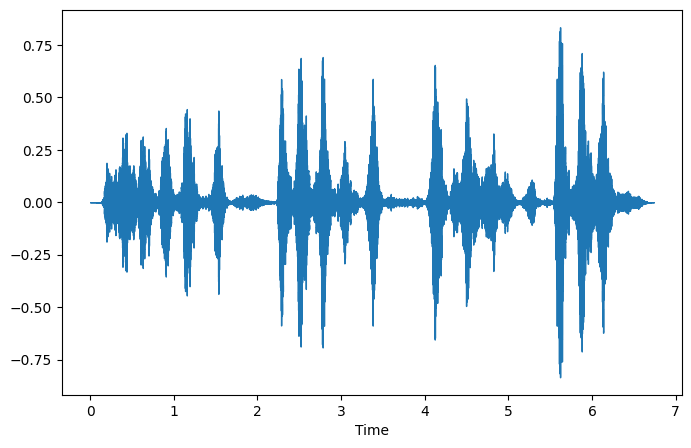

In [ ]:
#можем прослушать наш аудиофайл
import IPython.display as ipd

audio_data = '/content/lay-dobermana.wav'
y, sr = librosa.load(str(audio_data))
#print(type(y), type(sr))
plt.figure(figsize=(8, 5))
librosa.display.waveshow(y, sr=sr)
ipd.Audio(audio_data)

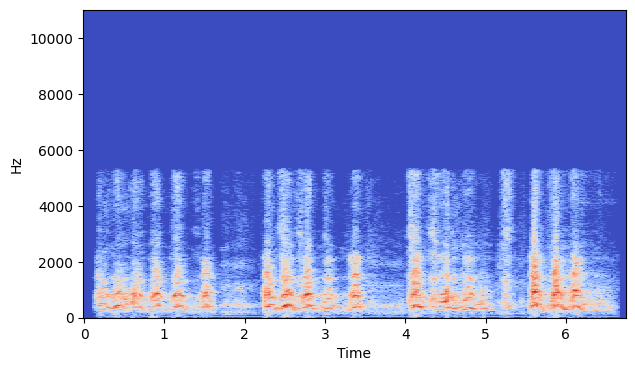

In [ ]:
# Построим спектрограмму загруженной вавки
audio_data = '/content/lay-dobermana.wav'
y, sr = librosa.load(str(audio_data))
stft = librosa.stft(y)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(7,4))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')

In [ ]:
def max_volume_db(audio_path):
  audio_file = audio_path
  path=audio_file
  y, sr = librosa.load(audio_file)
  # вычисление максимального уровня громкости
  max_volume_db = librosa.amplitude_to_db((y))
  print('Max volume',audio_path[9:],':', abs(max_volume_db[0]), 'dB')
  return  abs(max_volume_db)[0]

In [ ]:
data_db=[]
breed=['doberman','schipperke', 'siberian_husky', 'scottish_deerhound', 'mastiff','rottweiler']
data_db.append(max_volume_db('/content/lay-dobermana.wav'))
data_db.append(max_volume_db('/content/lay-malenkoy-sobaki-shpits-35392.wav'))
data_db.append(max_volume_db('/content/lay-sobaki-eskimosskaya-layka-35389.wav'))
data_db.append(max_volume_db('/content/lay-sobaki-porodyi-kolli-25610.wav'))
data_db.append(max_volume_db('/content/sobaka-porodyi-mastif-25584.wav'))
data_db.append(max_volume_db('/content/sobaka-rotveyler-25637.wav'))

Max volume lay-dobermana.wav : 81.58215 dB
Max volume lay-malenkoy-sobaki-shpits-35392.wav : 81.29562 dB
Max volume lay-sobaki-eskimosskaya-layka-35389.wav : 80.118645 dB
Max volume lay-sobaki-porodyi-kolli-25610.wav : 88.42481 dB
Max volume sobaka-porodyi-mastif-25584.wav : 82.26967 dB
Max volume sobaka-rotveyler-25637.wav : 83.16998 dB


In [ ]:
data_audio = pd.DataFrame(
    {'breed': breed,
     'power_db': data_db
    })
data_audio
data_audio.to_csv('data_audio')
